In [ ]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
#Playing with shape
#x_temp=X_train
#x_temp.reshape(-1,60000).shape
x_temp = None

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

In [ ]:
for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i],cmap="gray")
    plt.title(str(y_train[i]))
    plt.axis("off")
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i],cmap="gray")
    ax.set_title(str(y_train[i]))

In [ ]:
#rescale [0,255] -> [0,1]
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [ ]:
#OnehotLabel
import pandas as pd
y_train=np.array(pd.get_dummies(y_train))

In [ ]:
##Reshaping X_train
X_train_matrix = X_train.reshape(60000,-1)
X_train_matrix.shape

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
model = Sequential()
model.add(Dense(32,input_dim=X_train_matrix.shape[1]))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

In [ ]:
model.fit(X_train_matrix,y_train,epochs=200,batch_size=124,verbose=1)
score = model.evaluate(X_train_matrix,y_train)

In [ ]:
X_test_flatten = X_test.reshape(X_test.shape[0],-1)
y_test_one_hot = np.array(pd.get_dummies(y_test))

In [ ]:
score_test = model.evaluate(X_test_flatten,y_test_one_hot)
score_test[1]

In [ ]:
#Model in Lecture
from keras.layers import Dropout
model1 = Sequential()
model1.add(Dense(512,input_dim=X_train_matrix.shape[1]))
model1.add(Dropout(0.5))
model1.add(Dense(512))
model1.add(Dropout(0.7))
model1.add(Dense(10,activation="softmax"))
model1.summary()

In [ ]:
model1.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
score_1 = model1.evaluate(X_test_flatten,y_test_one_hot)
100*score_1[1]

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="./best_weight_mnist.hdf5",verbose=1,
                              save_best_only=True)
hist = model1.fit(X_train_matrix,y_train,batch_size=128,epochs=6,validation_split=0.2,
                 callbacks=[checkpointer],verbose=1,shuffle=True)

In [ ]:
score_1 = model1.evaluate(X_test_flatten,y_test_one_hot)
100*score_1[1]

# Convolution Neural Network

In [ ]:
##OK WITH Lossing DATA then PADDING = "VALID"
# IF NOT OK WITH LOSSING THE DATA THEN PADDING = "SAME"
#Depends on the stride of our filter



In [ ]:
from keras.layers import Conv2D
Conv2D(filters,kernel_size,strides,padding,activation="relu",input_shape)
#filters - the number of filter
#Kernel_size - number specifying both height and width of (square)
#convolution window.
#activation-typically relu.if not specify anything then no activation function
#strongly encouraged to specify relu in activation 
#strides-the stride of convolution , if not specified then default is 1.
#padding - one of "valid" or "same" if nothing is not specified then by default is set to "valid"
#NOTE : it is possible to reperesent both kernel_size and strides as either a number or a tuple
#When using your convolution layer as the first layer (appearing after the input layer)in a model,we must provide a input shape
#And donot specify a input shape if its not the first layer.

# Example #1

In [ ]:
#Say I'm constructing a CNN and my input layer accepts a grayscale images that are 
#200by200 pixels(corresponding to a 3D array with height 200, width 200 depth 1).Then
#say I'd like the next layer to be a convolution layer with 16 filters,each with width and 
#height of 3. When performing the convoultion, I'd like the filter to jump two pixels
#at a time. I also don't want the filter to extend outside of the image bondaries 
#in other words,I don't want to pad the images with zeros. Then, to construct this convolution 
#layer, I would use the following line of command



Conv2D(filters=16,kernel_size=2,strides=2,activation="relu",input_shape=(200,200,1))


# Example #2

In [ ]:
# Say I'd like the next layer in my CNN to be a convolution layer that takes 
#the layer constructed in Example 1 as input. Say I'd like my new layer to have 32 
#filters,each with a height and width of 3.When performing convolution, I'd like the filter 
#to jump 1 pixels at a time. I want the convolution layer to see all regions of previous layer, and 
#so I don't mind if the filter hangs over the edge of previous layer when its performing
#the convolution. Then, to construct this convolution layer I would use following
#line of code
Conv2D(filters=32,kernel_size=3,padding="same",activation="relu")

# Example #3

In [ ]:
#In this case, there are 64 filters and the size of filter is (2x2), and the 
#layer has a Relu activation function.The other arguments in the layer use the
#default values, so this convolution uses a stride of 1 and the padding is set to
#"valid"(so no padding)
Conv2D(64,(2,2),activation="relu")

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,strides=2,padding="valid",activation="relu",
                input_shape = (200,200,1)))
model.summary()

In [ ]:
## Take note how the number of parameter in the convolution layer changes
## Params # 80 
## also notice the shape of the convolution layer changes . This corresponds
# to value under Output shape in the printed output.
# None corresponds to the batch size, and the convolution layer has. a height of 100,
# width of 100 and depth of 16


# Formula: Number of Parameter in a convolution Layer

Number of parameter in a covolution layer depends on the supplied values of **filters**, **kernel_size** and **input_shape**.
K - the number of filter in a convolution layer
F -  the height and width of convolution filters
D_in - the depth of previous layer
Notice that K = filters and F=kernel_size . likewise D_in the last value in the input_shape tuple.
Since there are (**F x F x D_in**) weights per filter, and the convolution layer is composed of K filters, the total number of weights in convolution layer is equal to **K x F x F x D_in** and there is a bias term per filter thus the number of parameters in convolution layer is give by **(K x F x F x D_in + K)**



In [ ]:
2*2*16*1 + 16
## Above example number of parameters

# Formula: Shape of a Convolution Layer

The shape of a convoution layer depends on the supplied values of **kernel_size, input_shape, padding** and **stride**.
* K - the number of filter in the convolution layer 
* F - the height and width of convolution filters
* S - the stride of convolution filters
* H_in - the height of the previous layer
* W_in - the width of the previous layer
Notice that K = filters , F = kernel_size and S = stride and H_in and W_in is equal to first and second value of input_shape respectively.
* The depth of convolution layer will be always be equal to **K**(no of filter)
IF **padding = "same"**, then spatial dimension of the convolution layer are the following
* height = ceil(float(H_in)/float(S))
* width = ceil(float(W_in)/float(S))
If **padding = "valid"**, then spatial dimension of the convolution layer are the following:
* height = ceil(float(H_in - F +1)/float(S))
* width = ceil(float(W_in - F +1)/float(S))




# Quiz

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,strides=2,padding="same",
                activation = "relu",input_shape=(128,128,3)))
model.summary()
#Depth of convolution layer is equal to number of filter

# Polling of layers!

# Max Pooling layer

In [ ]:
# So if want to find a complex pattern in our data then we will have many filters 
#and dimentionalty we will increase thus it will overfit our training data
#THAT is the reason we introduce polling layer.
#first we will discuss about max polling layer 
#Max Pooling Layer
#Window Size: 2*2
#Strides 2
# So it reduces the dimension of convolution layer (Half of original size)



# Global average Pooling Layer!

In [ ]:
# A global average pooling layer takes a 3D array and turns it into a vector.


## Max Pooling Layers in Keras

In [ ]:
from keras.layers import MaxPooling2D
MaxPooling2D(pool_size=2,strides=2,padding="valid")

## Arguments
* pool_size - Number specifying the height and width of the pooling window
* strides - The vertical and horizontal stride. IF don't specify anything,strides will default to pool_size
* padding - One of the "valid" or "same". If don't specify anything padding is set to "valid"
Input could be number or tuple

## Example 
Say I'm constructing a CNN, and I'd like to reduce the dimentionality of a convolution layer by following it with a max pooling layer.Say the convolution layer has size **(100,100,15)** and I'd like the max pooling layer to have a size **(50,50,15)**. I can do this by using 2 x 2 window in my max pooling layer, with a stride of 2,which could be constructed in the following line of code.

In [ ]:
MaxPooling2D(pool_size=2,strides=2)
# IF you'd like to use a stride of 1, but still keep the size of window at 
#2 x 2 then we could use
MaxPooling2D(pool_size=2,strides=1)

## Checking the Dimentionality of Max Pooling Layers


In [ ]:
from keras.layers import MaxPooling2D
from keras.models import Sequential
model = Sequential()
model.add(MaxPooling2D(pool_size=2,strides=2,input_shape=(100,100,15)))
model.summary()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",
                input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

## Things to Remember
* Always add a ReLU activation to Conv2D layer in your CNN. With the exception of the final layer in the network, Dense layers should also have a ReLU activation function
* When constructing a network for classification, the final layer in the network should be a dense layer with a Softmax activation function. The number of nodes in the final layer should be equal the total number of classes in the dataset.


# CIFAR-10 --CNNs

In [1]:
import keras 
from keras.datasets import cifar10

# LOAD THE PRE -SHUFFLED TRAIN AND TEST DATA
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i])) 

In [2]:
#Normalizing the data
x_train = x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [5]:
from keras.utils import np_utils
import numpy as np
import pandas as pd
#one hot encoding in keras
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,10)

In [6]:
#break data into training and validation set
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

In [ ]:
#print(x_train.shape)
#print(y_train.shape)

In [ ]:
#Infereing
print(x_train.shape)
print(y_valid.shape)

In [7]:
#print number of training, validation ,and test images
print(x_train.shape[0],"training samples")
print(x_test.shape[0],"testing samples")
print(x_valid.shape[0],"validating samples")

45000 training samples
10000 testing samples
5000 validating samples


# First Model-- Regular Vanilla Neural Network!

In [ ]:
#falttening of image 
x_train_vanilla = x_train.reshape(x_train.shape[0],-1)
x_valid_vanilla = x_valid.reshape(x_valid.shape[0],-1)
x_test_vanilla = x_test.reshape(x_test.shape[0],-1)
print(x_train_vanilla.shape)

In [ ]:
#Vanilla Model
from keras.models import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(1000,activation="relu",input_dim=x_train_vanilla.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation="softmax"))
model.summary()

In [ ]:
#compile model
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",
             metrics=["accuracy"])

In [ ]:
#Training the model!!
from keras.callbacks import ModelCheckpoint
#train model
checkpointer = ModelCheckpoint(filepath="MLP.weights.best.hdf5",verbose=1,
                              save_best_only=True)
hist = model.fit(x_train_vanilla,y_train,batch_size=32,epochs=20,
                validation_data=(x_valid_vanilla,y_valid),callbacks=[checkpointer],
                verbose=2,shuffle=True)

In [ ]:
#loading the weights that yeilds the best calidation accuracy
model.load_weights("MLP.weights.best.hdf5")

In [ ]:
##Checking the accuracy
accuracy=model.evaluate(x_test_vanilla,y_test)
print(100*accuracy[1],"Testing accuracy of the data in vanilla model")

# Second Model --CNNs

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
model = Sequential()
model.add(Conv2D(filters=16,activation="relu",padding="same",kernel_size=2,
                input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,activation="relu",padding="same",kernel_size=2))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,activation="relu",padding="same",kernel_size=2))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(510,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation="softmax"))
model.summary()

In [ ]:
#Compling the model
from keras import optimizers
adam = optimizers.Adam()
model.compile(loss="categorical_crossentropy",optimizer=adam,
             metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer_cnn = ModelCheckpoint(filepath="CNN.best.weights.hdf5",
                                  verbose=1,save_best_only=True)
model.fit(x_train,y_train,verbose=2,batch_size=124,epochs=10,
          callbacks=[checkpointer_cnn],validation_data=(x_valid,y_valid),
         shuffle=True)

In [ ]:
model.load_weights("CNN.best.weights.hdf5")
score = model.evaluate(x_test,y_test)
print(100*score[1])

In [ ]:
print(100*score[1])

# Data Agumentation

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
checkpoint = ModelCheckpoint(filepath="CNN.aug_best.weights.hdf5",save_best_only=True,verbose=2)
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,
                            rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,
                            horizontal_flip=True)
datagen.fit(x_train)
hist = model.fit_generator(datagen.flow(x_train,y_train,batch_size=124),steps_per_epoch=len(x_train)/124,epochs=100,
                          callbacks=[checkpoint],validation_data = (x_valid,y_valid),verbose=2)

In [ ]:
model.load_weights("CNN.aug_best.weights.hdf5")
score = model.evaluate(x_test,y_test)
print(100*score[1])

In [ ]:
print(100*score[1])


## Create and Config Agumented Image Generator

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip = True)
datagen_train.fit(x_train)

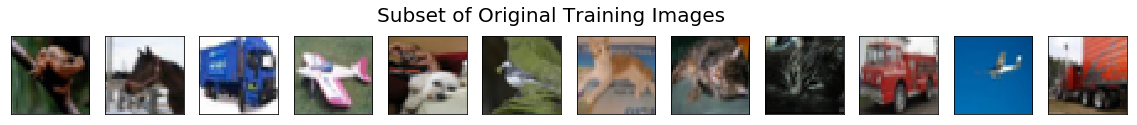

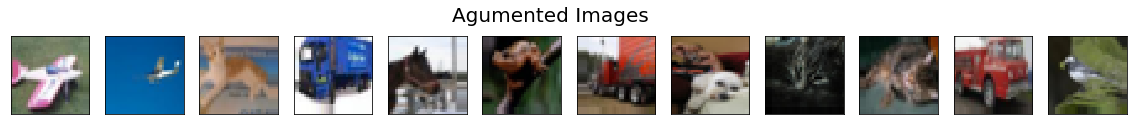

In [9]:
import matplotlib.pyplot as plt
#take a subset of training data
x_train_subset = x_train[:12]

#Visualize subset of taining data
fig = plt.figure(figsize=(20,2))
for i in range(0,len(x_train_subset)):
    ax = fig.add_subplot(1,12,i+1,xticks=[],yticks=[])
    ax.imshow(x_train_subset[i])
fig.suptitle("Subset of Original Training Images",fontsize=20)
plt.show()

# Visualize agumented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset,batch_size=12):
    for i in range(0,12):
        ax = fig.add_subplot(1,12,i+1,xticks=[],yticks=[])
        ax.imshow(x_batch[i])
    fig.suptitle("Agumented Images",fontsize=20)
    plt.show()
    break;

# Define the Model Architecture

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
model = Sequential()
model.add(Conv2D(filters=16,activation="relu",padding="same",kernel_size=2,
                input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,activation="relu",padding="same",kernel_size=2))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,activation="relu",padding="same",kernel_size=2))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [11]:
model.compile(loss="categorical_crossentropy",optimizer="adam",
             metrics=["accuracy"])

In [12]:
from keras.callbacks import ModelCheckpoint
batch_size=32
epochs =100
checkpointer=ModelCheckpoint(filepath="CNN.aug_best.weights.hdf5",
                            verbose=1,save_best_only=True)
model.fit_generator(datagen_train.flow(x_train,y_train,batch_size=batch_size),
                                      epochs=epochs,verbose=2,callbacks=[checkpointer],
                                      validation_data=(x_valid,y_valid),
                                      validation_steps=x_valid.shape[0]//batch_size,
                                      steps_per_epoch=x_train.shape[0]//batch_size)

Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.26420, saving model to CNN.aug_best.weights.hdf5
19s - loss: 1.5674 - acc: 0.4265 - val_loss: 1.2642 - val_acc: 0.5436
Epoch 2/100
Epoch 00001: val_loss improved from 1.26420 to 1.08886, saving model to CNN.aug_best.weights.hdf5
16s - loss: 1.2739 - acc: 0.5422 - val_loss: 1.0889 - val_acc: 0.6190
Epoch 3/100
Epoch 00002: val_loss improved from 1.08886 to 1.00925, saving model to CNN.aug_best.weights.hdf5
16s - loss: 1.1442 - acc: 0.5893 - val_loss: 1.0092 - val_acc: 0.6370
Epoch 4/100
Epoch 00003: val_loss improved from 1.00925 to 0.91616, saving model to CNN.aug_best.weights.hdf5
16s - loss: 1.0672 - acc: 0.6195 - val_loss: 0.9162 - val_acc: 0.6778
Epoch 5/100
Epoch 00004: val_loss did not improve
16s - loss: 1.0109 - acc: 0.6403 - val_loss: 0.9327 - val_acc: 0.6716
Epoch 6/100
Epoch 00005: val_loss improved from 0.91616 to 0.87721, saving model to CNN.aug_best.weights.hdf5
16s - loss: 0.9681 - acc: 0.6565 - val_loss: 0.8772 - 

Epoch 00057: val_loss did not improve
16s - loss: 0.5527 - acc: 0.8065 - val_loss: 0.5805 - val_acc: 0.8058
Epoch 59/100
Epoch 00058: val_loss did not improve
16s - loss: 0.5451 - acc: 0.8077 - val_loss: 0.5848 - val_acc: 0.8058
Epoch 60/100
Epoch 00059: val_loss did not improve
16s - loss: 0.5462 - acc: 0.8076 - val_loss: 0.5875 - val_acc: 0.7980
Epoch 61/100
Epoch 00060: val_loss did not improve
16s - loss: 0.5445 - acc: 0.8089 - val_loss: 0.5822 - val_acc: 0.8062
Epoch 62/100
Epoch 00061: val_loss did not improve
16s - loss: 0.5427 - acc: 0.8077 - val_loss: 0.5866 - val_acc: 0.8046
Epoch 63/100
Epoch 00062: val_loss did not improve
16s - loss: 0.5357 - acc: 0.8076 - val_loss: 0.6126 - val_acc: 0.7926
Epoch 64/100
Epoch 00063: val_loss did not improve
16s - loss: 0.5406 - acc: 0.8085 - val_loss: 0.6022 - val_acc: 0.8004
Epoch 65/100
Epoch 00064: val_loss did not improve
16s - loss: 0.5358 - acc: 0.8109 - val_loss: 0.6172 - val_acc: 0.7934
Epoch 66/100
Epoch 00065: val_loss did not im

In [13]:
model.load_weights("CNN.aug_best.weights.hdf5")
score = model.evaluate(x_test,y_test)


10000/10000 [==============================] - 0s     


In [14]:
print(100*score[1])

79.8
